In [2]:
#importing required libraries
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [3]:
#Reading a single image just to see our color detection works or not
img=cv2.imread('/content/drive/My Drive/screen_shots_video_5/s1.jpg')
#img=cv2.imread('path to image')

In [4]:
#converting the defaul BGR channel to RGB channel
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

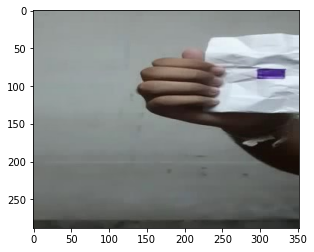

In [5]:
#plotting the image
plt.imshow(img)

In [6]:
#light_purple_1=(29,10,76)
#dark_purple_1=(69,50,116)
#picking the colors from the image that we need to detect
light_purple_1=(57,26,123)
dark_purple_1=(97,106,163)
light_purple=(39,9,95)
dark_purple=(79,49,135)

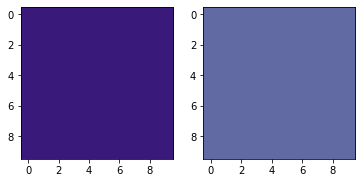

In [8]:
#displaying the colors we have picked
lo_fill=np.full((10,10,3),light_purple_1,dtype='uint8')/255.0
do_fill=np.full((10,10,3),dark_purple_1,dtype='uint8')/255.0
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.imshow(lo_fill)
ax1=fig.add_subplot(1,2,2)
ax1.imshow(do_fill)

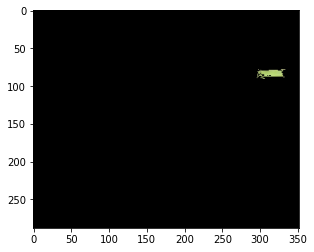

In [12]:
#making the mask and applying it on the image to detect the color
mask2=cv2.inRange(img,light_purple,dark_purple) #making the mask
mask1=cv2.inRange(img,light_purple_1,dark_purple_1)
result=cv2.bitwise_and(img,img,mask=mask1)#applying the mask on the image using bitwise and
result=cv2.bitwise_not(result,result,mask=mask1)
plt.imshow(result)

In [ ]:
#files=os.listdir('/content/drive/My Drive/screen_shot_video_4/')

In [13]:
#making the function to read the image from folder where it is stored
def imge(i):
    img=cv2.imread('/content/drive/My Drive/screen_shots_video_5/s{}.jpg'.format(i))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [14]:
#making the function to apply mask on all the images
def mask(img,i):
  if(i<=30):
    mask1=cv2.inRange(img,light_purple_1,dark_purple_1)
    result=cv2.bitwise_and(img,img,mask=mask1)
    result=cv2.bitwise_not(result,result,mask=mask1)
  elif(i>30):
    mask2=cv2.inRange(img,light_purple,dark_purple)
    result=cv2.bitwise_and(img,img,mask=mask2)
    result=cv2.bitwise_not(result,result,mask=mask2)
  return result

In [16]:
def final__img():
  final_img=[]
  for i in range(1,61):
    img=imge(i)
    result=mask(img,i)
    final_img.append(result)
  return final_img


In [18]:
final_img=final__img()
final_image=sum(final_img)
final_image.shape
final_image=final_image.astype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


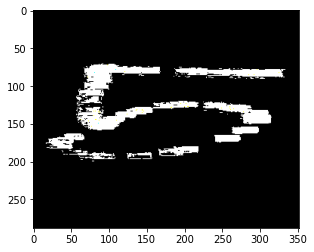

In [19]:
plt.imshow(final_image,cmap='gray')

In [32]:
#download the image and crop it and resize it to 28x28
#as the classifier work only images with size (28x28)

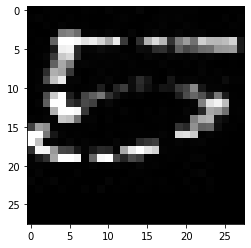

In [29]:
crop_image=cv2.imread('/content/drive/My Drive/screen_shots_video_5/test_5.jpg')
crop_image=crop_image[:,:,1]
plt.imshow(crop_image,cmap='gray')

In [20]:
#making model for image classification

In [21]:
#imporing libraries for classifier
import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,BatchNormalization,Activation,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [22]:
#loading data for classifier
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


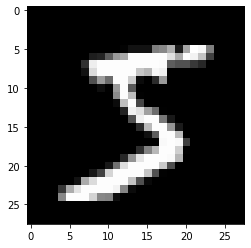

In [23]:
#preprocessing data 
plt.imshow(x_train[0],cmap='gray')
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [26]:
#defining model
def model():
    model=Sequential([
                  Conv2D(16,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dropout(0.2),
                  Dense(512,activation='relu'),
                  Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)
    return model,history

In [27]:
#as the model is alreadly trained we load the model in the loaded_model
loaded_model=tf.keras.models.load_model('/content/drive/My Drive/digit_recognizer_model.h5')

In [ ]:
#x_trin=np.expand_dims(x_train[5],0)

In [30]:
crop_image=np.expand_dims(crop_image,-1)
crop_image=crop_image.astype('float32')
pred_img=np.expand_dims(crop_image,0)
prediction=loaded_model.predict_classes(pred_img)
print('The number you have shown me is {}'.format(prediction[0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The number you have shown me is 5


In [33]:
#java script for accessing camera
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


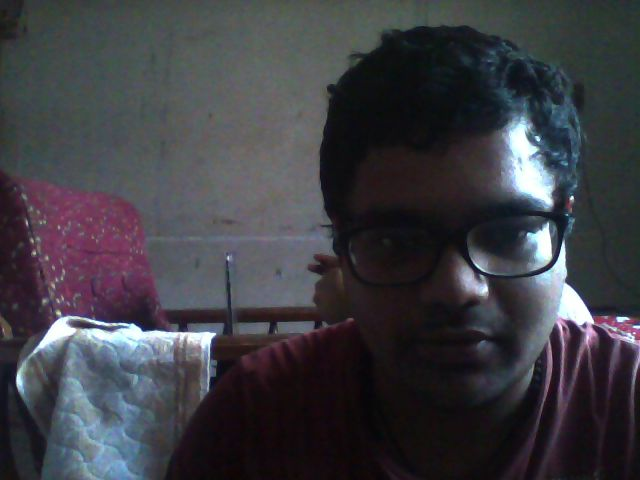

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [38]:
import cv2 
import numpy as np 
   
# Create a VideoCapture object and read from input file 
cap = cv2.VideoCapture('tree.mp4') 
   
# Check if camera opened successfully 
if (cap.isOpened()== False):  
  print("Error opening video  file") 
   
# Read until video is completed 
while(cap.isOpened()): 
      
  # Capture frame-by-frame 
  ret, frame = cap.read() 
  if ret == True: 
   
    # Display the resulting frame 
    cv2.imshow('Frame', frame) 
   
    # Press Q on keyboard to  exit 
    if cv2.waitKey(25) & 0xFF == ord('q'): 
      break
   
  # Break the loop 
  else:  
    break
   
# When everything done, release  
# the video capture object 
cap.release() 
   
# Closes all the frames 
cv2.destroyAllWindows() 

Error opening video  file
